In [49]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_decision_regions


In [50]:
df = pd.read_csv('fast_food_affectss.csv')
df.head()

,Name,Gender,Age,Weight?,type,local/brand,Ingre,type of patient,anxiety/depression,headache,...,Mood swing,craving of fast food,diarhea,gastritis,stomach,vomit,aggressive,type_of_hunger?,vitamins tablets,fast food is healthy
0,Esha Iqbal,Female,18 - 22 years,50,2 or 3 times in a month,both,No one,other,not regular consumer,Not regular consumer,...,Yes,Yes,No,No,Yes,sometime,No,No,Yes,No
1,Junaid Javed,Male,18 - 22 years,60,2 or 3 times in a week,Local fast food,No one,other,sometimes,No,...,sometime,No,No,No,Yes,No,sometime,No,No,May be yes
2,Areeba,Female,18 - 22 years,42,2 or 3 times in a week,brand,Oily,other,sometimes,No,...,Yes,Yes,No,No,sometime,No,No,No,No,May be yes
3,Zarghona,Female,22 - 26 years,46,2 or 3 times in a month,Local fast food,Oily,other,sometimes,No,...,Yes,No,No,No,Yes,Yes,No,Yes,No,No
4,Roshni Mustafa,Female,22 - 26 years,45,after long time,both,High sodium,other,sometimes,Yes,...,Yes,sometime,sometime,sometime,Yes,Yes,sometime,No,No,No


In [51]:
df.shape

(119, 24)

In [52]:
df.size

2856

In [53]:
df.isnull().sum()

Name                    0
Gender                  0
Age                     0
Weight?                 0
type                    0
local/brand             0
Ingre                   0
type of patient         0
anxiety/depression      0
headache                1
acne problem            1
disease                 0
muscle fatigue          0
digestive issue         0
Mood swing              0
craving of fast food    0
diarhea                 0
gastritis               0
 stomach                0
 vomit                  0
aggressive              0
 type_of_hunger?        0
vitamins tablets        0
fast food is healthy    0
dtype: int64

In [54]:
df=df.dropna()

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 118
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  117 non-null    object
 1   Gender                117 non-null    object
 2   Age                   117 non-null    object
 3   Weight?               117 non-null    int64 
 4   type                  117 non-null    object
 5   local/brand           117 non-null    object
 6   Ingre                 117 non-null    object
 7   type of patient       117 non-null    object
 8   anxiety/depression    117 non-null    object
 9   headache              117 non-null    object
 10  acne problem          117 non-null    object
 11  disease               117 non-null    object
 12  muscle fatigue        117 non-null    object
 13  digestive issue       117 non-null    object
 14  Mood swing            117 non-null    object
 15  craving of fast food  117 non-null    ob

In [56]:
df.columns

Index(['Name', 'Gender', 'Age', 'Weight?', 'type', 'local/brand', 'Ingre ',
       'type of patient', 'anxiety/depression', 'headache', 'acne problem',
       'disease', 'muscle fatigue', 'digestive issue', 'Mood swing',
       'craving of fast food', 'diarhea', 'gastritis', ' stomach', ' vomit',
       'aggressive', ' type_of_hunger?', 'vitamins tablets',
       'fast food is healthy'],
      dtype='object')

In [57]:
df.nunique()

Name                    111
Gender                    2
Age                       4
Weight?                  40
type                      5
local/brand               3
Ingre                     4
type of patient           4
anxiety/depression        4
headache                  5
acne problem              4
disease                  48
muscle fatigue            4
digestive issue           4
Mood swing                3
craving of fast food      3
diarhea                   4
gastritis                 4
 stomach                  4
 vomit                    3
aggressive                5
 type_of_hunger?          5
vitamins tablets          3
fast food is healthy      4
dtype: int64

In [58]:
y = df.iloc[:, -1]
x = df.iloc[:, :-1]
x.head(3)

,Name,Gender,Age,Weight?,type,local/brand,Ingre,type of patient,anxiety/depression,headache,...,digestive issue,Mood swing,craving of fast food,diarhea,gastritis,stomach,vomit,aggressive,type_of_hunger?,vitamins tablets
0,Esha Iqbal,Female,18 - 22 years,50,2 or 3 times in a month,both,No one,other,not regular consumer,Not regular consumer,...,Sometime,Yes,Yes,No,No,Yes,sometime,No,No,Yes
1,Junaid Javed,Male,18 - 22 years,60,2 or 3 times in a week,Local fast food,No one,other,sometimes,No,...,Sometime,sometime,No,No,No,Yes,No,sometime,No,No
2,Areeba,Female,18 - 22 years,42,2 or 3 times in a week,brand,Oily,other,sometimes,No,...,Sometime,Yes,Yes,No,No,sometime,No,No,No,No


In [59]:
cl = df.columns.to_list()
cl.pop(3)
cl

['Name',
 'Gender',
 'Age',
 'type',
 'local/brand',
 'Ingre ',
 'type of patient',
 'anxiety/depression',
 'headache',
 'acne problem',
 'disease',
 'muscle fatigue',
 'digestive issue',
 'Mood swing',
 'craving of fast food',
 'diarhea',
 'gastritis',
 ' stomach',
 ' vomit',
 'aggressive',
 ' type_of_hunger?',
 'vitamins tablets',
 'fast food is healthy']

In [60]:
for i in range(len(cl)):
    df[cl[i]] = LabelEncoder().fit_transform(df[cl[i]])    

In [61]:
df

,Name,Gender,Age,Weight?,type,local/brand,Ingre,type of patient,anxiety/depression,headache,...,Mood swing,craving of fast food,diarhea,gastritis,stomach,vomit,aggressive,type_of_hunger?,vitamins tablets,fast food is healthy
0,29,0,1,50,1,1,2,3,1,1,...,1,1,0,0,1,2,0,0,1,2
1,43,1,1,60,2,0,2,3,2,0,...,2,0,0,0,1,0,3,0,0,1
2,14,0,1,42,2,2,3,3,2,0,...,1,1,0,0,2,0,0,0,0,1
3,103,0,2,46,1,0,3,3,2,0,...,1,0,0,0,1,1,0,1,0,2
4,76,0,2,45,4,1,0,3,2,3,...,1,2,2,2,1,1,3,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,78,1,1,62,1,1,3,3,3,0,...,0,0,1,2,1,0,0,0,0,2
115,32,1,1,50,2,0,1,3,1,1,...,0,0,0,0,1,1,0,0,0,0
116,94,0,1,55,4,1,3,3,2,1,...,1,0,0,2,2,0,0,0,0,2
117,95,0,1,58,4,1,3,3,2,1,...,1,0,0,2,2,0,3,0,0,0


<AxesSubplot:>

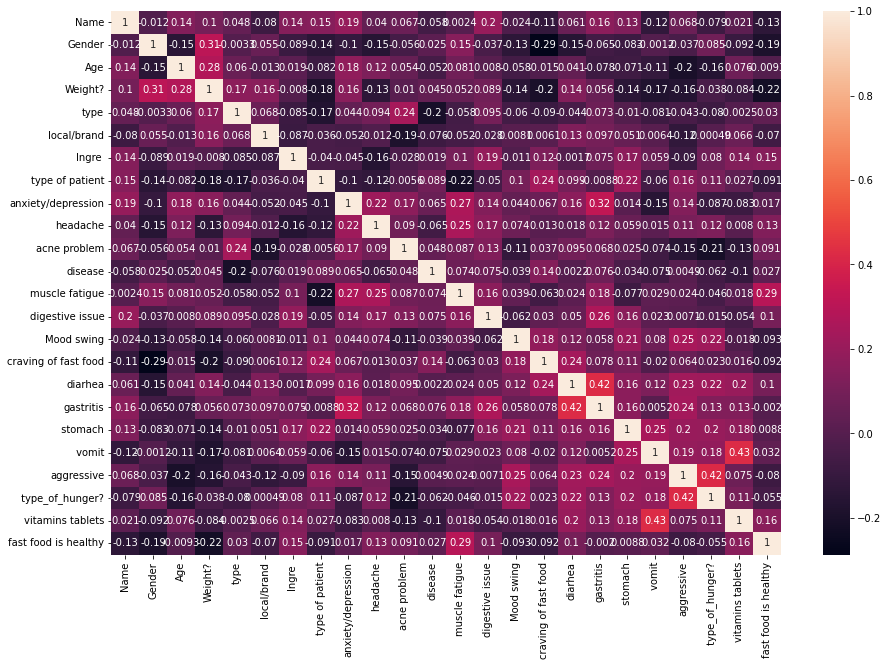

In [62]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [63]:
df['Weight?'].values

array([ 50,  60,  42,  46,  45,  50,  45,  40,  55,  55,  62,  52,  73,
        55,  40,  70,  55,  78,  60,  74,  80,  58,  45,  71,  45,  46,
        60,  47,  54,  60,  45,  71,  38,  62,  70,  51,  59,  67,  50,
        32,  58,  67,  59,  74,  53,  45,  55,  57,  60,  90,  45,  67,
        50,  70,  75,  73,  55,  56,  56,  58,  95,  45,  60,  52,  54,
        60,  70,  70,  65,  49,  50,  49,  78,  61,  56,  52,  65,  63,
        70,  45,  45,  62,  54, 106,  60,  59,  40,  50,  50,  51,  48,
        53,  60,  49,  51, 170,  25,  58,  53,  88,  67,  76,  60,  46,
        50,  68,  70,  70,  45,  90,  57,  58,  62,  50,  55,  58,  80],
      dtype=int64)

In [64]:
y = df.iloc[:, -1]
x = df.iloc[:, :-1]
x

,Name,Gender,Age,Weight?,type,local/brand,Ingre,type of patient,anxiety/depression,headache,...,digestive issue,Mood swing,craving of fast food,diarhea,gastritis,stomach,vomit,aggressive,type_of_hunger?,vitamins tablets
0,29,0,1,50,1,1,2,3,1,1,...,1,1,1,0,0,1,2,0,0,1
1,43,1,1,60,2,0,2,3,2,0,...,1,2,0,0,0,1,0,3,0,0
2,14,0,1,42,2,2,3,3,2,0,...,1,1,1,0,0,2,0,0,0,0
3,103,0,2,46,1,0,3,3,2,0,...,1,1,0,0,0,1,1,0,1,0
4,76,0,2,45,4,1,0,3,2,3,...,2,1,2,2,2,1,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,78,1,1,62,1,1,3,3,3,0,...,1,0,0,1,2,1,0,0,0,0
115,32,1,1,50,2,0,1,3,1,1,...,0,0,0,0,0,1,1,0,0,0
116,94,0,1,55,4,1,3,3,2,1,...,2,1,0,0,2,2,0,0,0,0
117,95,0,1,58,4,1,3,3,2,1,...,2,1,0,0,2,2,0,3,0,0


In [65]:
x = StandardScaler().fit_transform(x)
x

array([[-0.82943599, -0.80491448, -0.51668662, ..., -0.5975473 ,
        -0.75270739,  0.87635609],
       [-0.38558883,  1.24236801, -0.51668662, ...,  1.70727801,
        -0.75270739, -0.54772256],
       [-1.30498651, -0.80491448, -0.51668662, ..., -0.5975473 ,
        -0.75270739, -0.54772256],
       ...,
       [ 1.23128296, -0.80491448, -0.51668662, ..., -0.5975473 ,
        -0.75270739, -0.54772256],
       [ 1.26298633, -0.80491448, -0.51668662, ...,  1.70727801,
        -0.75270739, -0.54772256],
       [-0.70262251, -0.80491448,  2.29504985, ..., -0.5975473 ,
         0.00648886, -0.54772256]])

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [68]:
# kernel='linear'
# kernel='poly'
# kernel='rbf'
model = svm.SVC(kernel='linear', random_state=0)
model.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [69]:
# pip install mlxtend

In [70]:
# plot_decision_regions(x_train, y_train, clf=model)
# plt.legend(loc='upper left')
# plt.tight_layout()
# plt.show()

In [71]:
y_pred = model.predict(x_test)
y_pred

array([2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 0])

In [72]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
44,0,2
4,2,2
54,3,2
42,2,2
10,2,2
86,2,0
73,2,1
95,2,2
36,1,1
11,2,2


In [73]:
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.5833333333333334


In [74]:
confusion_matrix(y_test, y_pred)

array([[ 1,  2,  3,  0],
       [ 1,  2,  1,  0],
       [ 1,  1, 11,  0],
       [ 0,  0,  1,  0]], dtype=int64)

In [75]:
classification_report(y_test, y_pred)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

'              precision    recall  f1-score   support\n\n           0       0.33      0.17      0.22         6\n           1       0.40      0.50      0.44         4\n           2       0.69      0.85      0.76        13\n           3       0.00      0.00      0.00         1\n\n    accuracy                           0.58        24\n   macro avg       0.36      0.38      0.36        24\nweighted avg       0.52      0.58      0.54        24\n'

<AxesSubplot:>

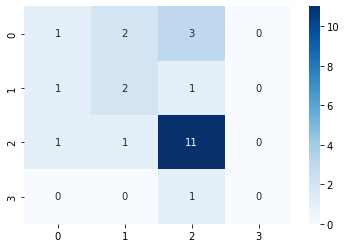

In [76]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

In [77]:
y = df.iloc[:, -1]
x = df.iloc[:, :-1]
x = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))


Accuracy: 0.4583333333333333
